## Final Proposal: Cool Under Pressure? Who have been the most "clutch" NFL Quarterbacks since 2009

#### Michael Mangia & George Varelas

### Proposal

This project will study the play of National Football league quarterbacks since 2009. Specifically, it will examine who the most clutch quarterbacks have been since that year. In Football, it is imperative to have a quarterback who can perform under pressure. Often, a team needs a quarterback who can help them win or tie a game when the team is losing or tied with another team. We will examine how well quarterbacks have performed in the final 4 minutes of a game when the two teams were separated by less than 10 points. 

This project will likely have 3 sections

* Calculations that formulate statistics for determining how clutch a quarterback is
* Descriptive statistics showing league averages, median, standard deviation, and other important data points
* Visualization of statistics on yearly overall quarterback play (Entire game statistics, not just "clutch" moments)
* Visualization of the data, showing the top 5 quarterbacks every year and the top 10 quarterbacks over the entire time period




### Data Report
The key data for this project comes from [here](https://github.com/ryurko/nflscrapR-data). This data has a collection of every single NFL play since 2009. Fortunately it is separated by year into multiple files to decrease the overall file size that we will be reading in at once. This is an extremely rich and dense dataset. It has everything from the players involved in a play to the side of the field that the play was run. Thus, we are able to perform a variety of calculations to help determine what we are looking for.

Some important statistics for quarterbacks include:
*  Completion Percentage  (Percentage of passes completed divided by total passes thrown)
* Touchdowns (A score of 6 points in football)
* Interceptions (A bad statistic, measure of a quarterback throwing the ball to the other team)
* Fumbles (When a player drops the ball and the other team recovers)
* 3rd down completions ( Measure of a quarterback keeping the ball for his team to make more plays)


Thus, our preliminary definition for clutch is a quarterback who performs well in these statistical categories when his team is down by less than 10 in the last 4 minutes of a game. We may expand on this definition if we deem it necessary.

In [25]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
nfl_2017 = pd.read_csv("https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/data/season_play_by_play/pbp_2017.csv")

/Users/Michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
nfl_2017.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2017-09-07,2017090700,1,1,NaN,15:00,15,3600.0,0.0,KC,...,NaN,0.500007,0.499993,0.506018,0.493982,0.500007,0.006011,NaN,NaN,2017
1,2017-09-07,2017090700,1,1,1.0,14:55,15,3595.0,5.0,NE,...,-2.950274,0.506018,0.493982,0.484055,0.515945,0.506018,-0.021963,0.068249,-0.090213,2017
2,2017-09-07,2017090700,1,1,2.0,14:49,15,3589.0,6.0,NE,...,1.665474,0.484055,0.515945,0.510010,0.489990,0.484055,0.025955,-0.024329,0.050284,2017
3,2017-09-07,2017090700,1,1,3.0,14:14,15,3554.0,35.0,NE,...,NaN,0.510010,0.489990,0.552982,0.447018,0.510010,0.042972,NaN,NaN,2017
4,2017-09-07,2017090700,1,1,1.0,13:52,14,3532.0,22.0,NE,...,NaN,0.552982,0.447018,0.546975,0.453025,0.552982,-0.006007,NaN,NaN,2017


In [8]:
nfl_2017.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=102)

This is a demonstration of how the dataset works. I am calling in every single play run by Tom Brady in 2017. From here, I can narrow down the data into times in which his team was down by less than 10 in the last 4 minutes of a game.

In [20]:
TB12 = nfl_2017 [ nfl_2017["Passer"] == "T.Brady"  ]

In [21]:
TB12
#shows all passes thrown by Tom Brady in 2017

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
1,2017-09-07,2017090700,1,1,1.0,14:55,15,3595.0,5.0,NE,...,-2.950274,0.506018,0.493982,0.484055,0.515945,0.506018,-0.021963,0.068249,-0.090213,2017
2,2017-09-07,2017090700,1,1,2.0,14:49,15,3589.0,6.0,NE,...,1.665474,0.484055,0.515945,0.510010,0.489990,0.484055,0.025955,-0.024329,0.050284,2017
5,2017-09-07,2017090700,1,1,2.0,13:26,14,3506.0,26.0,NE,...,0.050909,0.546975,0.453025,0.601218,0.398782,0.546975,0.054243,0.051581,0.002662,2017
7,2017-09-07,2017090700,1,1,2.0,12:35,13,3455.0,27.0,KC,...,0.296506,0.602024,0.397976,0.628791,0.371209,0.602024,0.026767,0.016233,0.010533,2017
8,2017-09-07,2017090700,1,1,1.0,12:24,13,3444.0,11.0,KC,...,NaN,0.628791,0.371209,0.687461,0.312539,0.628791,0.058670,NaN,NaN,2017
10,2017-09-07,2017090700,1,1,1.0,12:17,13,3437.0,4.0,KC,...,-1.178922,0.687617,0.312383,0.673273,0.326727,0.687617,-0.014344,0.026120,-0.040464,2017
15,2017-09-07,2017090700,3,1,1.0,12:00,12,3420.0,8.0,KC,...,-1.662816,0.822894,0.177106,0.812556,0.187444,0.822894,-0.010339,0.023165,-0.033504,2017
16,2017-09-07,2017090700,3,1,2.0,11:55,12,3415.0,5.0,KC,...,0.108514,0.812556,0.187444,0.801945,0.198055,0.812556,-0.010610,-0.013931,0.003321,2017
18,2017-09-07,2017090700,3,1,1.0,10:38,11,3338.0,43.0,KC,...,-1.164734,0.834337,0.165663,0.825704,0.174296,0.834337,-0.008633,0.013799,-0.022431,2017
20,2017-09-07,2017090700,3,1,3.0,09:53,10,3293.0,41.0,KC,...,NaN,0.808557,0.191443,0.816707,0.183293,0.808557,0.008150,NaN,NaN,2017


As an example of how rich the data set is, I performed this short demonstration. This is evidently a powerful dataset that we can get most of our information out of.

In [23]:
location =  TB12 [ TB12["InterceptionThrown"] == 1]["PassLocation"].value_counts()

In [27]:
location

middle    6
left      4
right     1
Name: PassLocation, dtype: int64

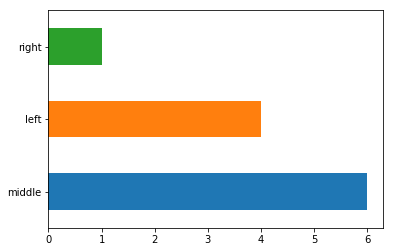

In [26]:
location.plot(kind= "barh")


We believe we have complex data set that will allow us to answer our question. However, we have to do a bit more work on this in terms of calculating a refined measure for "clutch". This project was inspired by [this work by Bleacher Report](http://thelab.bleacherreport.com/best-quarterbacks-nfl-2016-formula/). Some regarded this as a controversial article, so we wanted to investigate it. 